# Lista 1: SEL0326 - Controle de Sistemas Lineares

In [52]:
import numpy as np
import control.matlab as matlab 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Exercício 1: Pendulo simples

Certainly! Here's the LaTeX equation for the simple pendulum:

$$\frac{d^2\theta}{dt^2} = - \frac{g}{l}\sin\theta + \frac{1}{m l} F$$

Where:

$\theta$ is the angular displacement of the pendulum from its equilibrium position
$t$ is time
$g$ is the acceleration due to gravity

In [53]:
A = np.array([[0, 1], [10, 0]])

eigenvalues, eigenvectors = np.linalg.eig(A)

eigenvalues

array([ 3.16227766, -3.16227766])

In [54]:
B = np.array([[0, 0], [10, 0]])
C = np.array([[1, 0], [0, 0]])

sys = matlab.ss(A, B, C, 0)

t = np.linspace(0, 20, 1000)

print(sys)

<LinearIOSystem>: sys[10]
Inputs (2): ['u[0]', 'u[1]']
Outputs (2): ['y[0]', 'y[1]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [10.  0.]]

B = [[ 0.  0.]
     [10.  0.]]

C = [[1. 0.]
     [0. 0.]]

D = [[0. 0.]
     [0. 0.]]



(1000, 2)
(1000,)
(1000, 2)


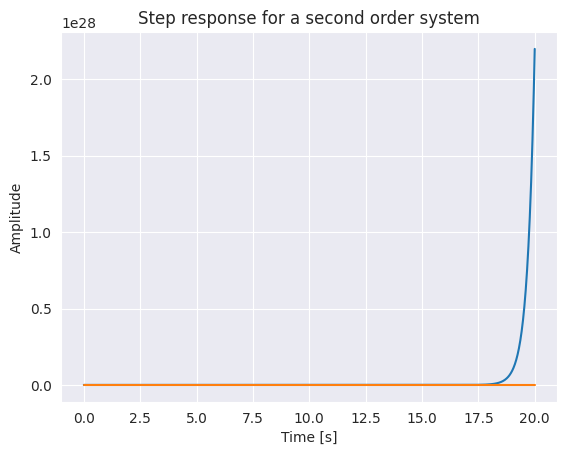

In [55]:
# simulate system dynamic for inicial condition x0 = [15, 0] and u = 0
y, t, x = matlab.lsim(sys, T=t, X0=[15, 0], U=0)

print(y.shape)
print(t.shape)
print(x.shape)

plt.plot(t, y[:, 0], label='y1')
plt.plot(t, y[:, 1], label='y2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for a second order system')
plt.show()

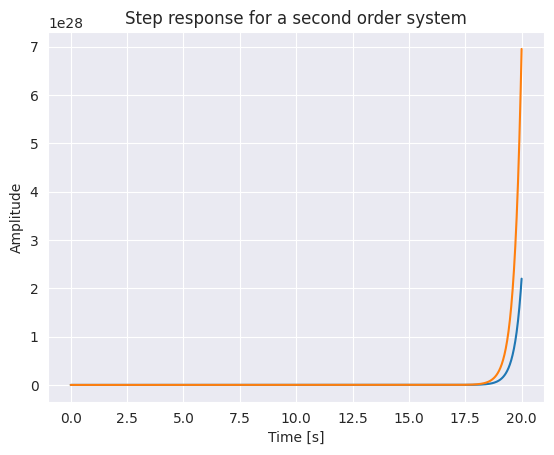

In [56]:
plt.plot(t, x[:, 0], label='y1')
plt.plot(t, x[:, 1], label='y2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for a second order system')
plt.show()

## Exercício 9: Sitema de Lorenz

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma(y-x) \\
\frac{dy}{dt} &= x(\rho-z)-y \\
\frac{dz}{dt} &= xy-\beta z
\end{aligned}
$$

Where:

$x$, $y$, and $z$ are the state variables of the system
$t$ is time
$\sigma$, $\rho$, and $\beta$ are parameters of the system.

<LinearIOSystem>: sys[12]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-10.          10.           0.        ]
     [ 28.          -1.           0.        ]
     [  0.           0.          -2.66666667]]

B = [[0.]
     [0.]
     [1.]]

C = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]]



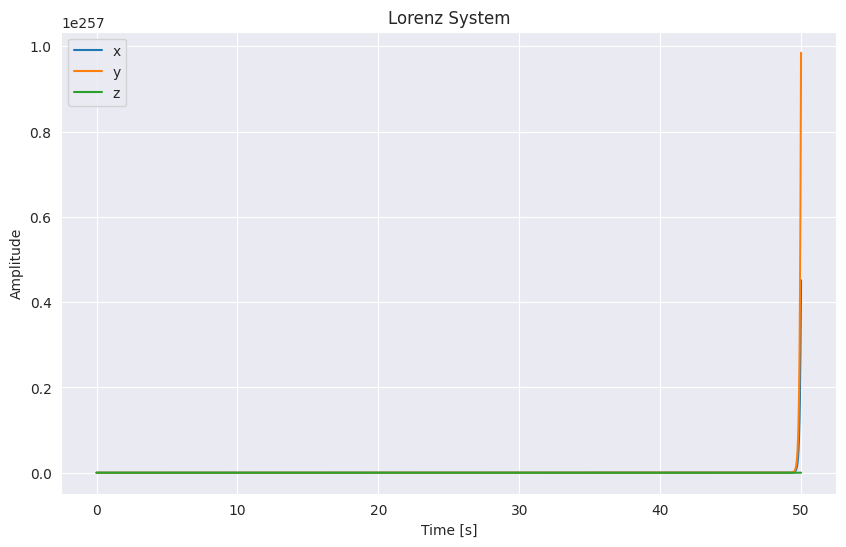

In [58]:
import numpy as np
import control.matlab as matlab 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Define the Lorenz system parameters
sigma = 10
rho = 28
beta = 8/3

# Define the state space matrices
A = np.array([[-sigma, sigma, 0], [rho, -1, 0], [0, 0, -beta]])
B = np.array([[0], [0], [1]])
C = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
D = np.array([[0], [0], [0]])

# Create the state space system
sys = matlab.ss(A, B, C, D)

print(sys)

# Define the time vector
t = np.linspace(0, 50, 10000)

# Define the initial condition
x0 = np.array([1, 1, 1])

# Simulate the system
y, t, x = matlab.lsim(sys, T=t, X0=x0, U=0)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, x[:, 0], label='x')
ax.plot(t, x[:, 1], label='y')
ax.plot(t, x[:, 2], label='z')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Lorenz System')
ax.legend()
plt.show()
